## Question 1

# Bài tập 1

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
import random
random.seed (0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName="/content/advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]


  # ****** your code here ******************
  features_X = np.insert(features_X, 0, 1, axis=1)

  return features_X , sales_Y

## Question 2

In [ ]:
features_X , _ = load_data_from_file()
print(features_X[:5 ,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


## Question 3

In [ ]:
_ , sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


# Bài tập 2

In [ ]:
def create_individual(n=4, bound=10):
  individual = []
  # *************** Your code here *******
  individual = [random.uniform(0, bound) for _ in range(n)]
  return individual

individual = create_individual()
print(individual)
# sample result : [[4.097462559682401, 4.827854760376531, 3.1021723599658957, 4.021659504395827]]

[8.444218515250482, 7.579544029403024, 4.20571580830845, 2.5891675029296337]


# Bài tập 3

In [ ]:
features_X, sales_Y = load_data_from_file()
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 0
  # ************ your code here ************
  fitness_value = 1 / (1+loss)
  return fitness_value

## Question 4

In [ ]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


# Bài tập 4

In [ ]:
def crossover(individual1, individual2, crossover_rate=0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  #*************** Your code here **************
  if random.random() < crossover_rate:
    index = random.randint(1, len(individual1) - 1)
    individual1_new[index:], individual2_new[index:] = individual2_new[index:], individual1_new[index:]

  return individual1_new, individual2_new

## Question 5

In [ ]:
# question 5
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover(individual1, individual2, 2.0)
print ("individual1: " , individual1)
print ("individual2: " , individual2)

individual1:  [4.09, 4.82, -0.79, -2.41]
individual2:  [3.44, 2.57, 3.1, 4.02]


# Bài tập 5

In [ ]:
def mutate(individual, mutation_rate=0.05) :
  individual_m = individual.copy()
  # ******** Your code here ******************
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual_m[i] = random.uniform(0, 10)
  return individual_m

## Question 6

In [ ]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


# Bài tập 6

In [ ]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

# Bài tập 7

In [ ]:
def selection(sorted_old_population, m = 100):
  index1 = random.randint(0, m-1)
  while True:
    index2 = random.randint(0, m-1)
    if (index2 != index1):
      break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
      individual_s = sorted_old_population[index2]
  return individual_s

# Bài tập 8

In [ ]:
def create_new_population(old_population, elitism=2, gen=1):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)
  if gen%1 == 0:
    print("Best loss:", compute_loss(sorted_population[m -1]), "with chromsome: ", sorted_population[m-1])

  new_population = []
  while len(new_population) < m-elitism:
    # selection
    # **************** your code here ****************
    parent1 = random.choice(sorted_population[m//2:])
    parent2 = random.choice(sorted_population[m//2:])
    # crossover
    # **************** your code here ****************
    child1, child2 = crossover(parent1, parent2)
    # mutation
    # **************** your code here ****************
    child1 = mutate(child1)
    child2 = mutate(child2)
    new_population.append(child1)
    if len(new_population) < m - elitism:
      new_population.append(child2)

    # copy elitism chromosomes that have best fitness score to the next generation
  for ind in sorted_population [m-elitism:]:
    # **************** your code here ****************
    new_population.append(ind)

  return new_population, compute_loss(sorted_population[m -1])

## Question 7

In [ ]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population , _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


# Bài tập 9

In [ ]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range ( n_generations ) :
    # *********** your code here *************
    fitness_scores = [compute_fitness(ind) for ind in population]

    best_loss = compute_loss(population[np.argmin(fitness_scores)])
    losses_list.append(best_loss)

    population, best_loss_current_gen = create_new_population(population, elitism=2, gen=i)
    print("Generation:", i, "Best loss:", best_loss_current_gen)
  return losses_list

# Bài tập 10

Best loss: 15155.10617745696 with chromsome:  [6.03977387811875, 0.0006916287448366365, 0.3891018401520452, 3.259439044599104]
Generation: 0 Best loss: 15155.10617745696
Best loss: 2870.168281015046 with chromsome:  [6.684886667173141, 0.002532098932251925, 1.675110935486388, 0.4713339199905531]
Generation: 1 Best loss: 2870.168281015046
Best loss: 2699.388732597643 with chromsome:  [6.03977387811875, 0.0006916287448366365, 0.3891018401520452, 1.3558077637136434]
Generation: 2 Best loss: 2699.388732597643
Best loss: 313.79591437972283 with chromsome:  [6.03977387811875, 0.0006916287448366365, 0.3891018401520452, 0.4223511400675217]
Generation: 3 Best loss: 313.79591437972283
Best loss: 192.94171298856804 with chromsome:  [6.03977387811875, 0.0006916287448366365, 0.3891018401520452, 0.31122141472294196]
Generation: 4 Best loss: 192.94171298856804
Best loss: 96.51218461410737 with chromsome:  [6.03977387811875, 0.0006916287448366365, 0.3891018401520452, 0.18278577933135476]
Generation: 5

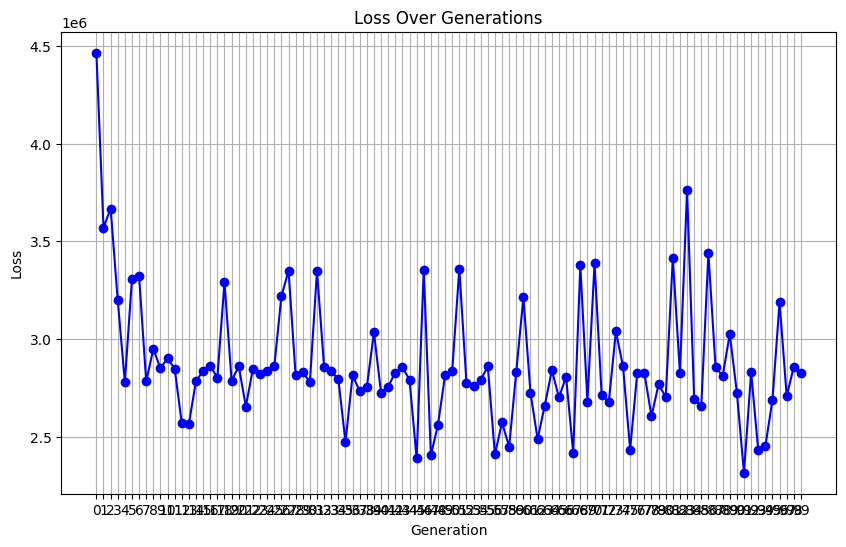

In [ ]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  # *********** your code here *************
  plt.figure(figsize=(10, 6))
  plt.plot(losses_list, color='blue', marker='o', linestyle='-')
  plt.title('Loss Over Generations')
  plt.xlabel('Generation')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.xticks(range(len(losses_list)))
  plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

# Bài tập 11

In [ ]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])
  estimated_prices = []
  for feature in features_X :
    # ************* your code here *************
    estimated_price = np.dot(feature, theta)
    estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label ='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt ()

NameError: name 'population' is not defined